# Predicting Air Pollution (PM2.5) in Beijing using Machine Learning
This notebook presents a machine learning approach to predict PM2.5 air pollution levels in Beijing using XGBoost. The model is trained on historical meteorological and pollution data and evaluated for performance using metrics like MSE and R² score.

In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import opendatasets as od

In [8]:
# Data loading
od.download("https://www.kaggle.com/datasets/djhavera/beijing-pm25-data-data-set")
df = pd.read_csv("beijing-pm25-data-data-set/PRSA_data_2010.1.1-2014.12.31.csv")
df = df.dropna()

Skipping, found downloaded files in ".\beijing-pm25-data-data-set" (use force=True to force download)


In [13]:
# Lag features
df['pm2.5_lag1'] = df['pm2.5'].shift(1)
df['pm2.5_lag2'] = df['pm2.5'].shift(2)

In [15]:
# Feature and target
X = df[['DEWP', 'TEMP', 'PRES', 'Iws', 'pm2.5_lag1', 'pm2.5_lag2']]
y = df['pm2.5']

In [17]:
# Basic statistics
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,pm2.5_lag1,pm2.5_lag2
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41756.000000,41755.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,98.615289,98.617459
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,92.050514,92.050548
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,29.000000,29.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000,72.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,137.000000,137.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,994.000000,994.000000


In [19]:
# Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Divide data to train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R^2 score: {r2:.4f}")
model.save_model("xgboost_pm25_model.json")

MSE: 613.06
R^2 score: 0.9304


XGBoost achieved strong predictive performance with a high R^2 score

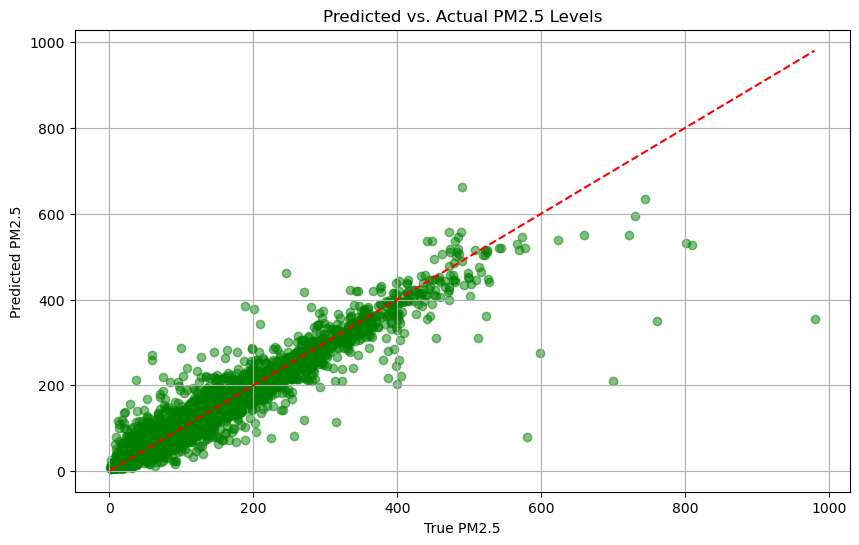

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Predicted vs. Actual PM2.5 Levels")
plt.grid(True)
plt.show()